In [2]:
import numpy as np
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from nitime.timeseries import TimeSeries
from nitime.analysis import SpectralAnalyzer, FilterAnalyzer, NormalizationAnalyzer
import matplotlib.pyplot as plt
from scipy import stats, signal
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scripts.abide_dataset import Abide
from nilearn.connectome import ConnectivityMeasure
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

In [25]:
diag = np.load('../data/diag_all.npy')
sfc = np.load('../data/sfc.npy')
gd = np.load('../data/gd_all.npy')
print(diag.shape, sfc.shape, gd.shape)
feature_size = [i for i in range(1, 50, 5)]
feature_size.append(100)

(841,) (841, 6786) (841, 13456)


In [26]:
def feature_size_analysis(sfc, diag):
    f1 = []
    f1_std = []
    for x in feature_size:
        clf = Pipeline([
            ('feature_selection', SelectPercentile(f_classif, percentile=x)),
            ('classification', svm.SVC(kernel='linear'))
        ])
        scoring = {
            'acc': 'accuracy',
            'f1': 'f1',
            'prec': 'precision',
            'rec': 'recall'
        }
        scores = cross_validate(clf, sfc, diag, scoring=scoring, cv = 5)  
        f1.append(scores['test_f1'].mean())
        f1_std.append(scores['test_f1'].std())
        print(f"Percent of features: {x} | Accuracy {scores['test_acc'].mean()*100}%")
    return f1, f1_std

In [27]:
f1_gd, f1_gd_std = feature_size_analysis(gd, diag)
f1_sfc, f1_sfc_std = feature_size_analysis(sfc, diag)

Percent of features: 1 | Accuracy 55.53113553113553%
Percent of features: 6 | Accuracy 57.67469709777402%
Percent of features: 11 | Accuracy 60.29022259791491%
Percent of features: 16 | Accuracy 57.90927021696252%
Percent of features: 21 | Accuracy 59.22090729783038%
Percent of features: 26 | Accuracy 58.387573964497044%
Percent of features: 31 | Accuracy 58.6228515074669%
Percent of features: 36 | Accuracy 58.7447168216399%
Percent of features: 41 | Accuracy 58.03324880247956%
Percent of features: 46 | Accuracy 59.103972950126796%
Percent of features: 100 | Accuracy 58.14595660749507%
Percent of features: 1 | Accuracy 56.24823894054665%
Percent of features: 6 | Accuracy 59.216680755142306%
Percent of features: 11 | Accuracy 58.02620456466611%
Percent of features: 16 | Accuracy 58.97506339814033%
Percent of features: 21 | Accuracy 60.64595660749508%
Percent of features: 26 | Accuracy 61.23555931248238%
Percent of features: 31 | Accuracy 60.40433925049309%
Percent of features: 36 | Accu

In [29]:
f1_gd = np.array(f1_gd)
f1_gd_std = np.array(f1_gd_std)
f1_sfc = np.array(f1_sfc)
f1_sfc_std = np.array(f1_sfc_std)

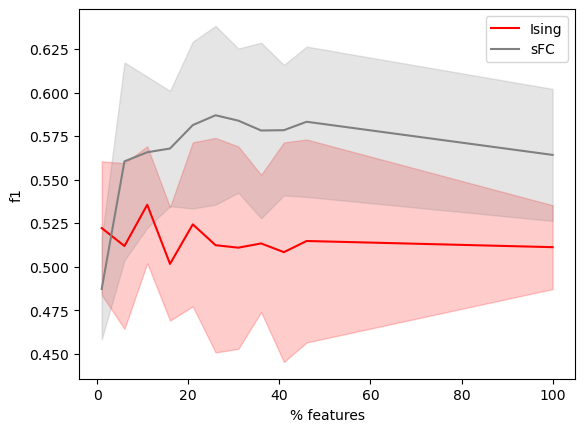

In [32]:


plt.xlabel('% features')
plt.ylabel('f1')
plt.plot(feature_size, f1_gd, label='Ising', color = 'red')
plt.plot(feature_size, f1_sfc, label='sFC', color='grey')
plt.fill_between(feature_size, f1_gd - f1_gd_std, f1_gd + f1_gd_std, color='red', alpha=0.2)
plt.fill_between(feature_size, f1_sfc - f1_sfc_std, f1_sfc + f1_sfc_std, color='grey', alpha=0.2)
plt.legend()
